In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from ipywidgets import interact, widgets

# Basic Enzymatic Reaction

$\dfrac{dS}{dt} = -k_{1}SE + k_{2}C$

$\dfrac{dC}{dt} = k_{1}SE - C(k_{-1} + k_{2})$

$\dfrac{dE}{dt} = -k_{1}SE + C(k_{-1} + k_{2})$

$\dfrac{dP}{dt} = k_{2}C$

In [7]:
def enzymatic_reactions(t, y, k_sc, k_cs, k_cp):
    S, C, E, P = y
    dS = -k_sc*S*E + k_cs*C
    dC = k_sc*S*E - C*(k_cs + k_cp) 
    dE = -k_sc*S*E + (k_cs + k_cp)*C
    dP = k_cp*C
    return dS, dC, dE, dP

def output(k_sc, k_cs, k_cp, init_vals, t_len):
    """
    init_vals = S0, C0, E0, P0
    """
    y0 = init_vals
    ret = solve_ivp(enzymatic_reactions, [0, t_len], y0, args = (k_sc, k_cs, k_cp))
    return ret

def plot_output(k_sc, k_cs, k_cp, S0, C0, E0, P0, t_len, plot_title=None):
    init_vals = S0, C0, E0, P0
    ret_vals = output(k_sc, k_cs, k_cp, init_vals, t_len)
    S, C, E, P = ret_vals.y
    plt.figure(figsize = (14,7))
    plt.title(plot_title)
    plt.xlim(left = 0, right = t_len)
    # plt.ylim(bottom = 0, top = 2)
    plt.plot(ret_vals.t, S, label = 'S')
    plt.plot(ret_vals.t, C, '--', label = 'C')
    plt.plot(ret_vals.t, E, label = 'E')
    plt.plot(ret_vals.t, P, label = 'P')
    plt.plot(ret_vals.t, C + E, 'k--', label = 'Total Enzyme Constant ($e_{T} = e + c$)')
    plt.legend()
    plt.ylabel("Concentration")
    plt.xlabel("Time")
    plt.show()

## Case 1: Basic

As expected, we see a very clear delination of the time scales. 

Parameters: 
- $k_{sc} = 30$
- $k_{cs} = 1$
- $k_{sc} = 10$
- $E_{0} = 1$
- Time Length = 1


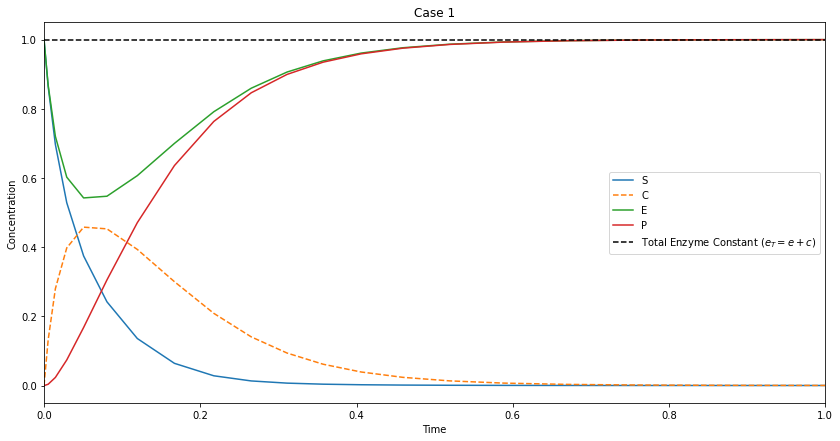

In [3]:
plot_output(k_sc = 30, 
            k_cs = 1, 
            k_cp = 10, 
            S0 = 1, 
            C0 = 0, 
            E0 = 1,
            P0 = 0, 
            t_len = 1,
            plot_title = "Case 1")

## Case 2: Initial Enzyme Amount

As we increase the inital concentration of the enzymes ($E_{0}$), the time it takes for the system to reach an equilibrium decreases.

Parameters: 
- $k_{sc} = 30$
- $k_{cs} = 1$
- $k_{sc} = 10$
- $E_{0} = 3$
- Time Length = 1

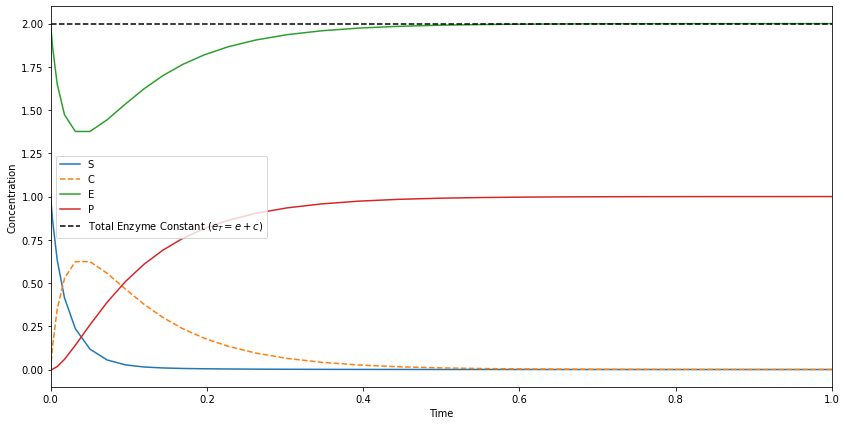

In [4]:
plot_output(k_sc = 30, 
            k_cs = 1, 
            k_cp = 10, 
            S0 = 1, 
            C0 = 0, 
            E0 = 2,
            P0 = 0, 
            t_len = 1)

## Case 3

Increasing the **catalytic constant** ($k_{2}$) increases the rate at which the equilibrium is reached. 

That makes sense, given that the product formation rate constant is $\dfrac{1}{k_{2}}$

In [5]:
w = interact(plot_output, 
            k_sc = widgets.IntText(value = 30, step = 1, description = '$k_{1}$'), 
            k_cs = widgets.IntText(value = 1, step = 1, description = '$k_{-1}$'), 
            k_cp = widgets.IntText(value = 10, step = 1, description = '$k_{2}$'), 
            S0 = widgets.IntText(value = 1, step = 1, description = '$S_{0}$'), 
            C0 = widgets.IntText(value = 0, step = 1, description = '$C_{0}$'), 
            E0 = widgets.IntText(value = 1, step = 1, description = '$E_{0}$'), 
            P0 = widgets.IntText(value = 0, step = 1, description = '$P_{0}$'), 
            t_len = widgets.IntText(value = 1, step = 1, description = 'Time Length'), 
            plot_title = widgets.Text())
    

interactive(children=(IntText(value=30, description='$k_{1}$'), IntText(value=1, description='$k_{-1}$'), IntT…

## Case 4
Increasing either $k_{1}$ or $k_{-1}$ should ...

In [8]:
w = interact(plot_output, 
            k_sc = widgets.IntText(value = 30, step = 1, description = '$k_{1}$'), 
            k_cs = widgets.IntText(value = 1, step = 1, description = '$k_{-1}$'), 
            k_cp = widgets.IntText(value = 10, step = 1, description = '$k_{2}$'), 
            S0 = widgets.IntText(value = 1, step = 1, description = '$S_{0}$'), 
            C0 = widgets.IntText(value = 0, step = 1, description = '$C_{0}$'), 
            E0 = widgets.IntText(value = 1, step = 1, description = '$E_{0}$'), 
            P0 = widgets.IntText(value = 0, step = 1, description = '$P_{0}$'), 
            t_len = widgets.IntText(value = 1, step = 1, description = 'Time Length'), 
            plot_title = widgets.Text())
    

interactive(children=(IntText(value=30, description='$k_{1}$'), IntText(value=1, description='$k_{-1}$'), IntT…

# Competitive Inhibition

![](comp_inhibition1.png)

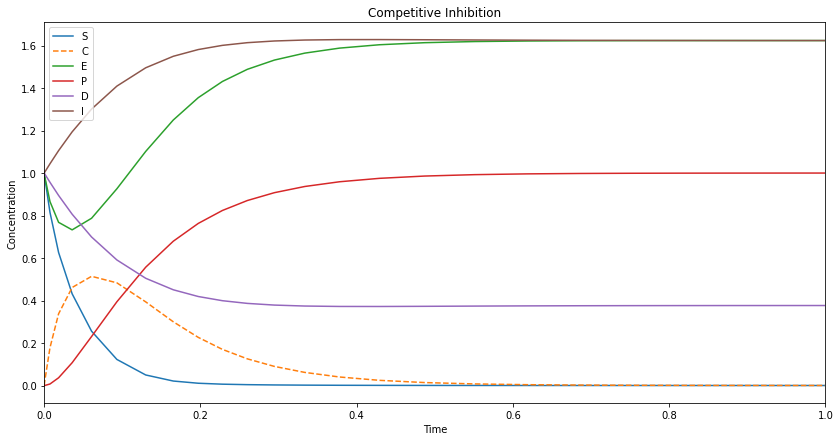

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, widgets

def competitive_inhibition(t, y, k_sc, k_cs, k_cp, k_id, k_di):
    S, C, E, P, D, I = y
    dS = -k_sc*S*E + k_cs*C 
    dC = k_sc*S*E - C*(k_cs + k_cp) 
    dE = -k_sc*S*E + (k_cs + k_cp)*C - k_id*I*E + k_di*D
    dP = k_cp*C
    dD = k_id*I*E - k_di*D
    dI = -k_id*I*E + k_di*D
    return dS, dC, dE, dP, dD, dI

def output(k_sc, k_cs, k_cp, k_id, k_di, init_vals, t_len):
    """
    init_vals = S0, C0, E0, P0, D0, I0
    """
    y0 = init_vals
    ret = solve_ivp(fun=competitive_inhibition, t_span=[0, t_len], y0=y0, args = (k_sc, k_cs, k_cp, k_id, k_di))
    return ret

def plot_output(k_sc, k_cs, k_cp, k_id, k_di, S0, C0, E0, P0, D0, I0, t_len, plot_title):
    init_vals = S0, C0, E0, P0, D0, I0
    ret_vals = output(k_sc, k_cs, k_cp, k_id, k_di, init_vals, t_len)
    S, C, E, P, D, I = ret_vals.y
    plt.figure(figsize = (14,7))
    plt.title(plot_title)
    plt.xlim(left = 0, right = t_len)
    # plt.ylim(bottom = 0, top = 2)
    plt.plot(ret_vals.t, S, label = 'S')
    plt.plot(ret_vals.t, C, '--', label = 'C')
    plt.plot(ret_vals.t, E, label = 'E')
    plt.plot(ret_vals.t, P, label = 'P')
    plt.plot(ret_vals.t, D, label = 'D')
    plt.plot(ret_vals.t, I, label = 'I')
    # plt.plot(ret_vals.t, C + E, 'k--', label = 'Total Enzyme Constant ($e_{T} = e + c$)')
    plt.legend()
    plt.ylabel("Concentration")
    plt.xlabel("Time")
    plt.show()

    
    

# w = interact(plot_output,
#     k_sc=widgets.IntText(value = 30, step = 1, description = 'k_sc'),
#     k_cs=widgets.IntText(value = 1, step = 1, description = 'k_cs'),
#     k_cp=widgets.IntText(value = 10, step = 1, description = 'k_cp'),
#     k_id=widgets.IntText(value = 1, step = 1, description = 'k_id'),
#     k_di=widgets.IntText(value = 7, step = 1, description = 'k_di'),
#     S0=widgets.IntText(value = 1, step = 1, description = 'S0'),
#     C0=widgets.IntText(value = 0, step = 1, description = 'C0'),
#     E0=widgets.IntText(value = 1, step = 1, description = 'E0'),
#     P0=widgets.IntText(value = 0, step = 1, description = 'P0'),
#     D0=widgets.IntText(value = 1, step = 1, description = 'D0'),
#     I0=widgets.IntText(value = 1, step = 1, description = 'I0'),
#     t_len=widgets.IntText(value = 1, step = 1, description = 't_len'),
#     plot_title="Competitive Inhibition",
# )

plot_output(
    k_sc=30,
    k_cs=1,
    k_cp=10,
    k_id=1,
    k_di=7,
    S0=1,
    C0=0,
    E0=1,
    P0=0,
    D0=1,
    I0=1,
    t_len=1,
    plot_title="Competitive Inhibition",
)
